In [2]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

In [106]:
def set_boundary(grid, size, width, thick, pot, pot2):

    tcr = int(size/2) 
    tcc = int(size/2)       
    
    grid[tcr-thick:tcr, tcc-int(width/2):tcc+int(width/2)] = pot

    bcr = int(size/2)  
    bcc = int(size/2)        

    grid[bcr:bcr+thick, bcc-int(width/2):bcc+int(width/2)] = pot2

    grid[0,:] = 0.0    
    grid[-1,:] = 0.0
    grid[:,0] = 0.0
    grid[:,-1] = 0.0
    return grid

In [107]:
size = 100      # Length of side of grid.
thick = 15      # Thickness (vertical) of capacitor plates.
width = 30      # Width (horizontal) of capacitor plates.
pot = 4        # Potential across capacitor.
pot2 = 4
grid = np.zeros((size,size))

gota_inicial = set_boundary(grid, size, width, thick, pot,pot2)
#print(gota_inicial)

In [108]:
def Euler_method(matrix,inter, D):
    dt = 0.1
    T = 0
    for t in range(inter):
        for x in range(1,len(matrix)-1):
            for y in range(1,len(matrix)-1):
                matrix[x][y] = (matrix[x][y] + D*(T+dt)*((matrix[x-1][y]+matrix[x+1][y]+matrix[x][y-1]+matrix[x][y+1]-4*matrix[x][y])))
    return matrix

In [109]:
inter = 1000
D = 1.6
gota_final = Euler_method(gota_inicial, inter, D)

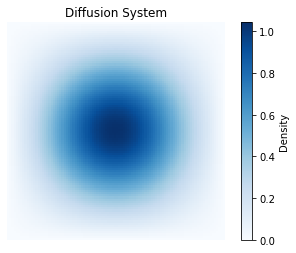

In [111]:
f1, ax1 = plt.subplots()

picture = ax1.imshow(gota_final, interpolation='none', cmap='Blues')
ax1.axis('off')
ax1.set_title('Diffusion System')
f1.colorbar(picture, label = "Density")
plt.show()